In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import TimeDistributed
 

#from tensorflow.keras.layers import Attention
#from attention_decoder import AttentionDecoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import max_error
import seaborn as sns
from keras.callbacks import History 
from sklearn.model_selection import KFold 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
path = os.getcwd()
folder = path+"/dataset/ts_jorge_MW8.6/"
print(folder)

/home/jorge/tsunami-warning/dataset/ts_jorge_MW8.6/


In [3]:
df = pd.read_json(folder+'DataFrame_boyas14_80viña.json') # cargar dataframe

In [4]:
index = pd.date_range('25/8/2020', periods=len(df), freq='S')
Datetime = pd.DataFrame({'Datetime':index})

In [5]:
df = pd.concat([Datetime, df], axis=1,)

In [6]:
df.head()

,Datetime,boyas14_ts002,inu_vina80_ts002,boyas14_ts034,inu_vina80_ts034,boyas14_ts035,inu_vina80_ts035,boyas14_ts043,inu_vina80_ts043,boyas14_ts050,...,boyas14_s_026,inu_vina80_s_026,boyas14_s_027,inu_vina80_s_027,boyas14_s_031,inu_vina80_s_031,boyas14_s_032,inu_vina80_s_032,boyas14_s_033,inu_vina80_s_033
0,2020-08-25 00:00:00,0.000000e+00,0,0.000000,0,0.000000e+00,0.0,0.000000,0,0.000000e+00,...,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
1,2020-08-25 00:00:01,-8.289000e-07,0,0.000003,0,2.070000e-07,0.0,-0.000001,0,6.162000e-07,...,0.000002,0,0.000001,0,0.000002,0,-0.000002,0,0.000002,0
2,2020-08-25 00:00:02,-1.751200e-06,0,0.000008,0,3.802000e-07,0.0,-0.000003,0,1.357000e-06,...,0.000006,0,0.000003,0,0.000005,0,-0.000005,0,0.000006,0
3,2020-08-25 00:00:03,-2.761000e-06,0,0.000015,0,4.539000e-07,0.0,-0.000006,0,2.279000e-06,...,0.000012,0,0.000006,0,0.000010,0,-0.000009,0,0.000010,0
4,2020-08-25 00:00:04,-4.259300e-06,0,0.000036,0,-6.210000e-08,0.0,-0.000016,0,4.225900e-06,...,0.000033,0,0.000014,0,0.000022,0,-0.000016,0,0.000025,0


Text(0, 0.5, 'Altura de ola [m]')

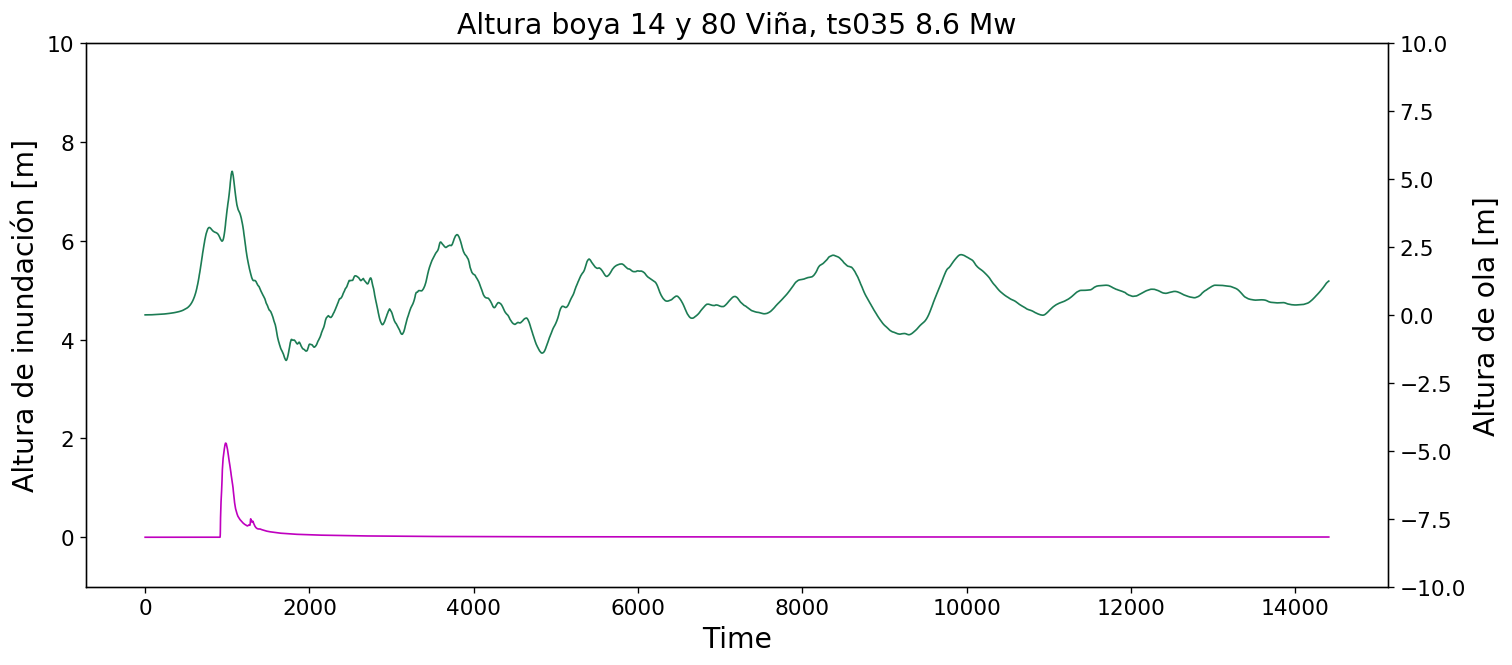

In [7]:
plt.figure(figsize=(14,6), dpi=120)

plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boya 14 y 80 Viña, ts035 8.6 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_vina80_ts035'], color='m', linewidth=1.0)
plt.ylim(-1,10)
plt.twinx()
plt.plot(df['boyas14_ts035'], color='#1C7C54', linewidth=1.0)
plt.ylim(-10,10)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)

In [8]:
df = df.loc[0:1799]

In [9]:
df.describe()

,boyas14_ts002,inu_vina80_ts002,boyas14_ts034,inu_vina80_ts034,boyas14_ts035,inu_vina80_ts035,boyas14_ts043,inu_vina80_ts043,boyas14_ts050,inu_vina80_ts050,...,boyas14_s_026,inu_vina80_s_026,boyas14_s_027,inu_vina80_s_027,boyas14_s_031,inu_vina80_s_031,boyas14_s_032,inu_vina80_s_032,boyas14_s_033,inu_vina80_s_033
count,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.000000,1800.000000,1800.0,1800.000000,1800.0,...,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0
mean,-0.433800,0.0,-0.235181,0.0,1.158015,0.207875,-0.928534,0.0,-0.219982,0.0,...,-0.296373,0.0,0.319565,0.0,-0.153182,0.0,0.102229,0.0,-0.465063,0.0
std,0.420061,0.0,1.019874,0.0,1.697167,0.423211,0.918122,0.0,0.416684,0.0,...,0.804060,0.0,0.358794,0.0,0.594830,0.0,0.961273,0.0,0.772165,0.0
min,-1.245867,0.0,-2.250021,0.0,-1.674535,0.000000,-2.743775,0.0,-1.370380,0.0,...,-1.929690,0.0,-0.300941,0.0,-1.126895,0.0,-1.672304,0.0,-1.785110,0.0
25%,-0.874718,0.0,-1.024356,0.0,0.022575,0.000000,-1.608396,0.0,-0.332048,0.0,...,-0.989233,0.0,0.044441,0.0,-0.834826,0.0,-0.231895,0.0,-1.225483,0.0
50%,-0.254434,0.0,0.078103,0.0,0.467110,0.000000,-0.462249,0.0,-0.010850,0.0,...,0.015975,0.0,0.206554,0.0,0.044420,0.0,-0.023792,0.0,-0.254409,0.0
75%,-0.073615,0.0,0.522265,0.0,2.780331,0.173391,-0.160161,0.0,0.042208,0.0,...,0.242644,0.0,0.567479,0.0,0.355305,0.0,0.896284,0.0,0.164774,0.0
max,0.066499,0.0,1.348361,0.0,5.281328,1.905331,0.405796,0.0,0.376588,0.0,...,0.616518,0.0,1.132151,0.0,0.675025,0.0,2.281345,0.0,0.649617,0.0


In [10]:
df = df.resample('S', on='Datetime').mean()

Text(0, 0.5, 'Altura de ola [m]')

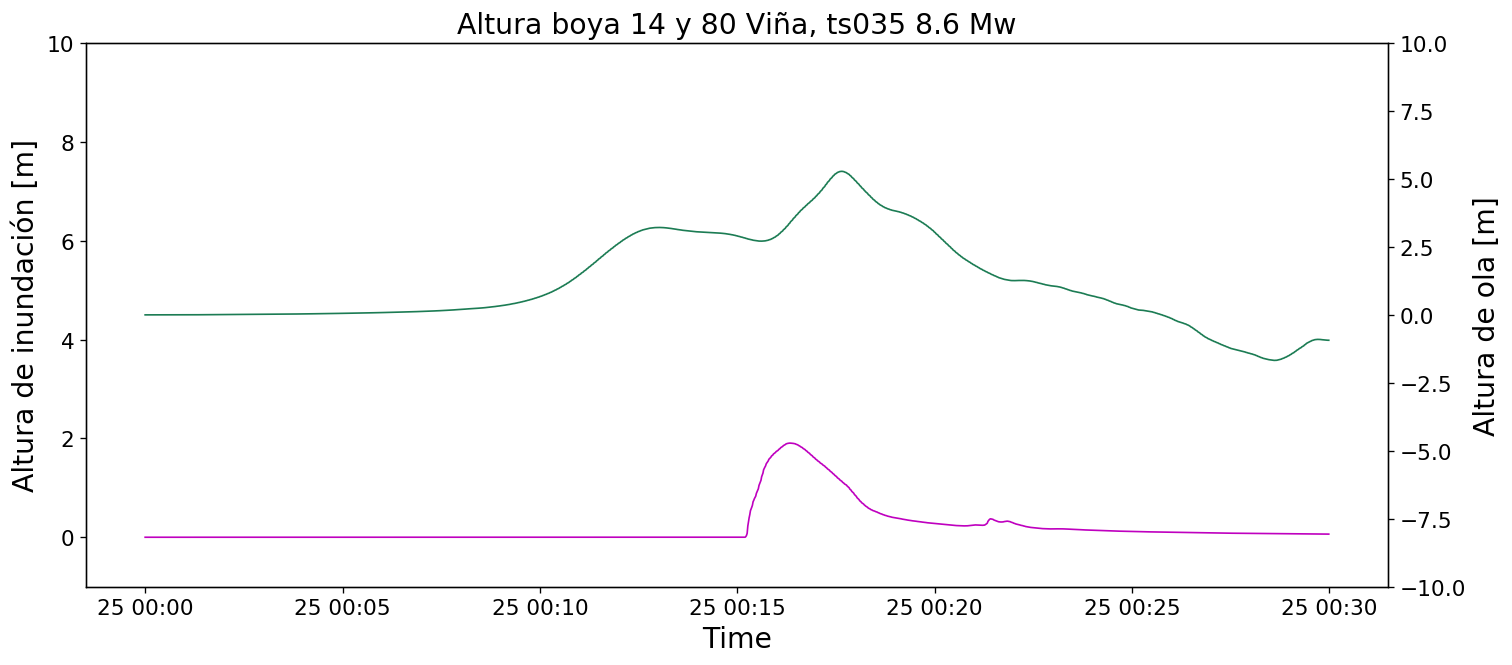

In [11]:
plt.figure(figsize=(14,6), dpi=120)

plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boya 14 y 80 Viña, ts035 8.6 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_vina80_ts035'], color='m', linewidth=1.0)
plt.ylim(-1,10)
plt.twinx()
plt.plot(df['boyas14_ts035'], color='#1C7C54', linewidth=1.0)
plt.ylim(-10,10)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)


In [12]:
df = df.resample('T').max()

Text(0, 0.5, 'Altura de ola [m]')

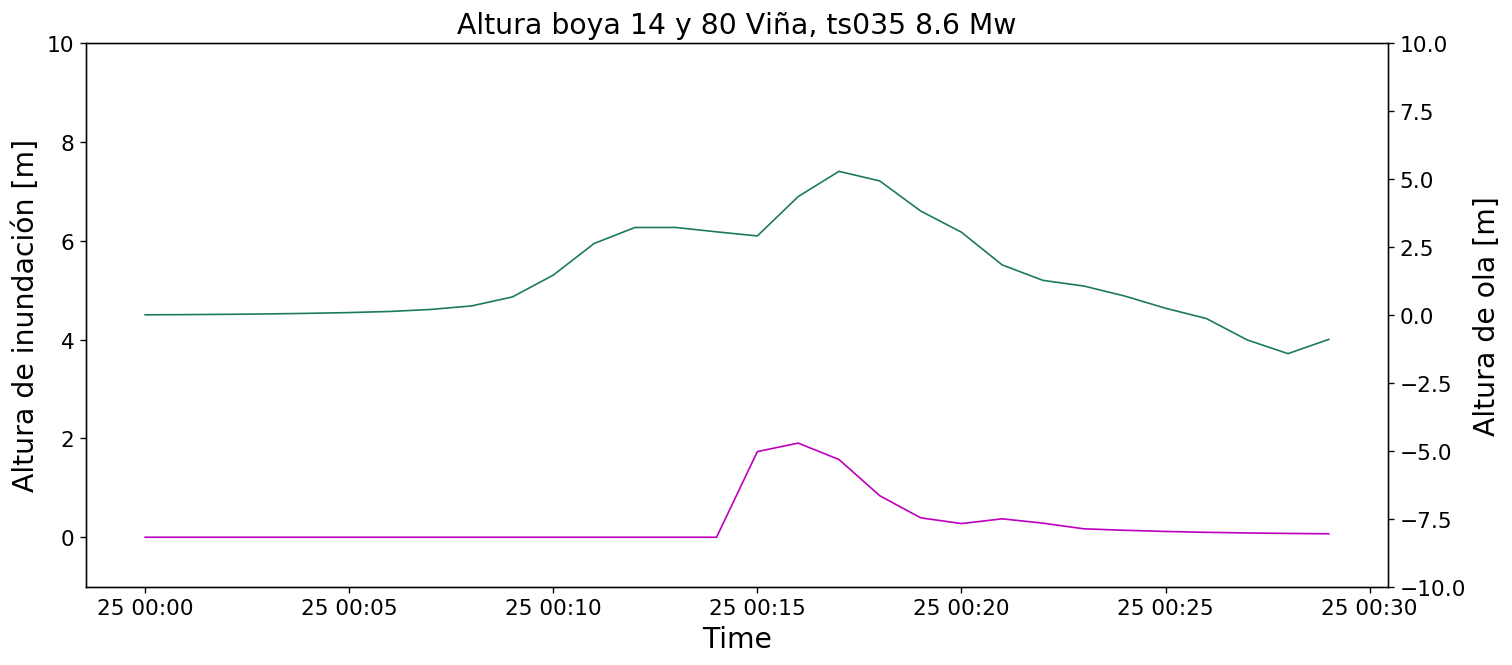

In [13]:
plt.figure(figsize=(14,6), dpi=120)

plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boya 14 y 80 Viña, ts035 8.6 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_vina80_ts035'], color='m', linewidth=1.0)
plt.ylim(-1,10)
plt.twinx()
plt.plot(df['boyas14_ts035'], color='#1C7C54', linewidth=1.0)
plt.ylim(-10,10)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)


In [14]:
df.describe()

,boyas14_ts002,inu_vina80_ts002,boyas14_ts034,inu_vina80_ts034,boyas14_ts035,inu_vina80_ts035,boyas14_ts043,inu_vina80_ts043,boyas14_ts050,inu_vina80_ts050,...,boyas14_s_026,inu_vina80_s_026,boyas14_s_027,inu_vina80_s_027,boyas14_s_031,inu_vina80_s_031,boyas14_s_032,inu_vina80_s_032,boyas14_s_033,inu_vina80_s_033
count,30.000000,30.0,30.000000,30.0,30.000000,30.000000,30.000000,30.0,30.000000,30.0,...,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0
mean,-0.394155,0.0,-0.089719,0.0,1.371253,0.271378,-0.806152,0.0,-0.163747,0.0,...,-0.214390,0.0,0.388731,0.0,-0.101210,0.0,0.229762,0.0,-0.390820,0.0
std,0.414798,0.0,1.011407,0.0,1.828753,0.530009,0.907281,0.0,0.402185,0.0,...,0.791118,0.0,0.386817,0.0,0.596063,0.0,1.018709,0.0,0.768537,0.0
min,-1.215326,0.0,-2.177659,0.0,-1.426765,0.000000,-2.684031,0.0,-1.247511,0.0,...,-1.801262,0.0,-0.054338,0.0,-1.083439,0.0,-1.511202,0.0,-1.750857,0.0
25%,-0.827186,0.0,-0.846643,0.0,0.040069,0.000000,-1.420789,0.0,-0.204250,0.0,...,-0.662403,0.0,0.071673,0.0,-0.743124,0.0,-0.213285,0.0,-1.026741,0.0
50%,-0.217094,0.0,0.170693,0.0,0.676391,0.034821,-0.349532,0.0,0.001221,0.0,...,0.057939,0.0,0.249767,0.0,0.068873,0.0,-0.002248,0.0,-0.197124,0.0
75%,-0.041528,0.0,0.726795,0.0,3.006577,0.250384,-0.109799,0.0,0.070798,0.0,...,0.301190,0.0,0.677601,0.0,0.384791,0.0,1.033767,0.0,0.206977,0.0
max,0.066499,0.0,1.348361,0.0,5.281328,1.905331,0.405796,0.0,0.376588,0.0,...,0.616518,0.0,1.132151,0.0,0.675025,0.0,2.281345,0.0,0.649617,0.0


In [15]:
#data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.5)
#data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

#scaler = StandardScaler().fit(df)
#df= pd.DataFrame(scaler.transform(df),
#                                 columns=df.columns)


In [16]:
xtest = df.pop('boyas14_ts035') # asigna y quita columna
ytest = df.pop('inu_vina80_ts035') # asigna y quita columna

In [17]:
df = df.values.astype('float32')
xtest = xtest.values.astype('float32')
ytest = ytest.values.astype('float32')

In [18]:
# genera secuencias de entrada y salida

def split_sequence(df):
    X, y = list(), list()
    for time in range(0,df.shape[1],2):
        # se suma uno porque no considera el ultimo
        seq_x, seq_y = df[:,time], df[:,time+1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [19]:
trainX,trainY = split_sequence(df)
testX,testY = xtest,ytest

In [20]:
n_features = 1
n_steps = trainX.shape[1]
print('n_steps :',n_steps)

n_steps : 30


In [21]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))


In [22]:
trainX.shape

(96, 30, 1)

In [23]:
trainY.shape

(96, 30)

In [24]:
groups = [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
          0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0]

**comentario :** Etiquetas para diferencias las escenarios que **Si inundan** y los que **No indundan**, debido a lo desbalanceada que esta la data aproximadamente solo el 18% de los escenarios inundan. 

## CNN 1-D LSTM.

In [25]:

import time
epoch = 200
Xm = trainX
ym = trainY
skf = StratifiedKFold(n_splits=2,random_state=42,shuffle=True)
skf.get_n_splits(Xm, groups)
start = time.time()

hist = History()
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
#model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(LSTM(30, activation='relu'))
model.add(Dense(n_steps))
model.compile(optimizer='adam', loss='mse')

for train, test in skf.split(Xm, groups): #tscv.split(Xm):
    history = model.fit(Xm[train], ym[train],validation_data=(Xm[test], ym[test]), epochs=epoch, verbose=1
                        ,callbacks=[hist])

end = time.time()

print('time execution',(end - start)/60)


Train on 48 samples, validate on 48 samples
Epoch 1/200
48/48 [==============================] - 4s 80ms/step - loss: 0.0131 - val_loss: 0.0507
Epoch 2/200
48/48 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.0502
Epoch 3/200
48/48 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.0500
Epoch 4/200
48/48 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.0498
Epoch 5/200
48/48 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0495
Epoch 6/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.0493
Epoch 7/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.0491
Epoch 8/200
48/48 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0489
Epoch 9/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.0486
Epoch 10/200
48/48 [==============================] - 0s 8ms/st

Epoch 161/200
48/48 [==============================] - 0s 4ms/step - loss: 8.6912e-04 - val_loss: 0.0388
Epoch 162/200
48/48 [==============================] - 0s 5ms/step - loss: 8.5712e-04 - val_loss: 0.0387
Epoch 163/200
48/48 [==============================] - 0s 5ms/step - loss: 8.6101e-04 - val_loss: 0.0388
Epoch 164/200
48/48 [==============================] - 0s 5ms/step - loss: 8.4162e-04 - val_loss: 0.0389
Epoch 165/200
48/48 [==============================] - 0s 6ms/step - loss: 8.3160e-04 - val_loss: 0.0387
Epoch 166/200
48/48 [==============================] - 0s 6ms/step - loss: 8.2845e-04 - val_loss: 0.0385
Epoch 167/200
48/48 [==============================] - 0s 4ms/step - loss: 8.1347e-04 - val_loss: 0.0386
Epoch 168/200
48/48 [==============================] - 0s 4ms/step - loss: 8.0157e-04 - val_loss: 0.0386
Epoch 169/200
48/48 [==============================] - 0s 6ms/step - loss: 7.9116e-04 - val_loss: 0.0385
Epoch 170/200
48/48 [==============================] - 

48/48 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 0.0119
Epoch 123/200
48/48 [==============================] - 0s 6ms/step - loss: 9.7421e-04 - val_loss: 0.0135
Epoch 124/200
48/48 [==============================] - 0s 5ms/step - loss: 7.5574e-04 - val_loss: 0.0116
Epoch 125/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0106
Epoch 126/200
48/48 [==============================] - 0s 7ms/step - loss: 8.2372e-04 - val_loss: 0.0104
Epoch 127/200
48/48 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0098
Epoch 128/200
48/48 [==============================] - 0s 4ms/step - loss: 6.6468e-04 - val_loss: 0.0122
Epoch 129/200
48/48 [==============================] - 0s 3ms/step - loss: 6.9428e-04 - val_loss: 0.0158
Epoch 130/200
48/48 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0160
Epoch 131/200
48/48 [==============================] - 0s 4ms/step - loss: 6.2154e-04

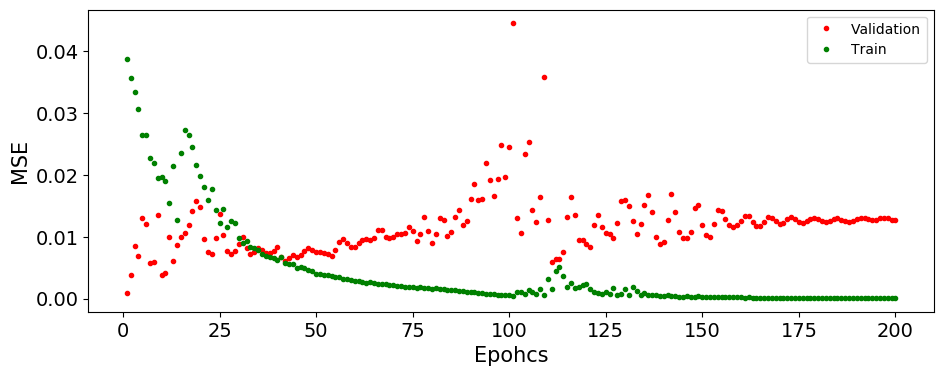

In [26]:
import matplotlib.pyplot as plt
a=np.linspace(1,epoch,epoch)
plt.figure(figsize=(24,4), dpi=100)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.subplot(1,2,1)
plt.plot(a,hist.history['val_loss'],'r.',label = 'Validation')
plt.plot(a,hist.history['loss'],'g.',label = 'Train')
plt.xlabel('Epohcs',fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.legend(loc='upper right')

In [27]:
trainX = df[:,50]
trainY = df[:,51]
trainX=trainX.reshape((1,n_steps,1))
testX=testX.reshape((1,n_steps,1))

In [28]:
trainPredict = (model.predict(trainX)).reshape(-1,1)
testPredict = (model.predict(testX)).reshape(-1,1)

In [29]:
# invert predictions
"""
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1,1))
trainY = scaler.inverse_transform(trainY.reshape(-1,1))
testPredict = scaler.inverse_transform(testPredict.reshape(-1,1))
testY = scaler.inverse_transform(testY.reshape(-1,1))
"""

'\ntrainPredict = scaler.inverse_transform(trainPredict.reshape(-1,1))\ntrainY = scaler.inverse_transform(trainY.reshape(-1,1))\ntestPredict = scaler.inverse_transform(testPredict.reshape(-1,1))\ntestY = scaler.inverse_transform(testY.reshape(-1,1))\n'

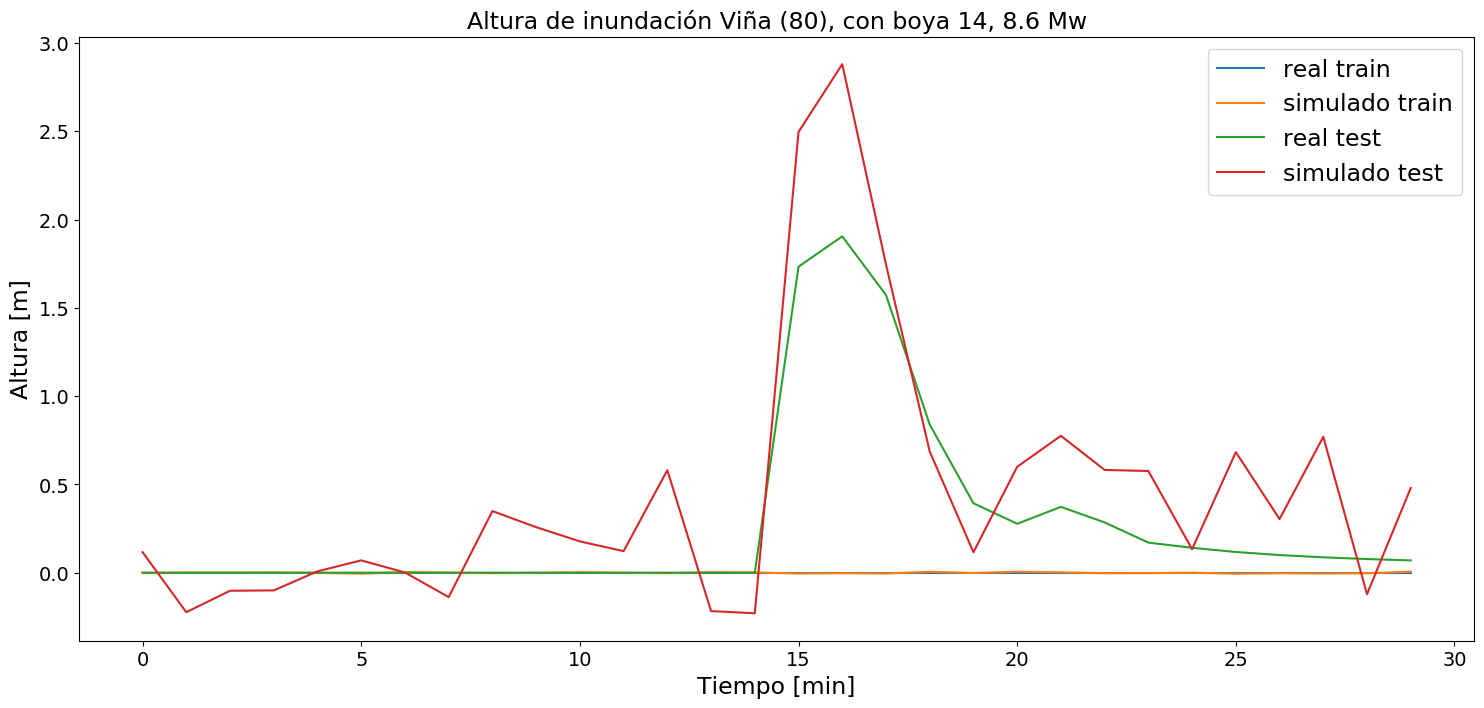

In [30]:
plt.figure(figsize=(18,8), dpi=100)

#plt.subplot(2,1,1)
plt.plot(trainY,label = 'real train')
plt.plot(trainPredict, label = 'simulado train')
plt.plot(testY,label = 'real test')
plt.plot(testPredict, label = 'simulado test')
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.title('Altura de inundación Viña (80), con boya 14, 8.6 Mw',fontsize=17)
plt.ylabel('Altura [m]',fontsize=17)
plt.xlabel('Tiempo [min]',fontsize=17)
plt.legend(loc='upper right',fontsize=17)

#plt.subplot(2,1,2)
#plt.plot(testY,label = 'real test')
#plt.plot(testPredict, label = 'simulado test')
#plt.rc('xtick', labelsize=17) 
#plt.rc('ytick', labelsize=17)
#plt.title('Altura de inundación boya 6 Valparaiso, E3 8.5 Mw',fontsize=17)
#plt.ylabel('Altura [m]',fontsize=17)
#plt.xlabel('Tiempo [s]',fontsize=17)
#plt.legend(loc='upper right',fontsize=17)

- buscar metrica que penalice mas el error de los maximos.
- buscar split que realice una separacion mas balanceada.
- probar modelo convolucional 1D. con atencion.
- transfer learning con autoencoder.
- capa attention en lstm